Author: Satyam Kumar (220444871)

Queen Mary University of London

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import the Library**

In [ ]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

**Mount Google Drive to access the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load the Train And Test folder**

In [ ]:
train_dir = '/content/drive/MyDrive/Training'
test_dir = '/content/drive/MyDrive/Testing'

**Display the image of the folder**

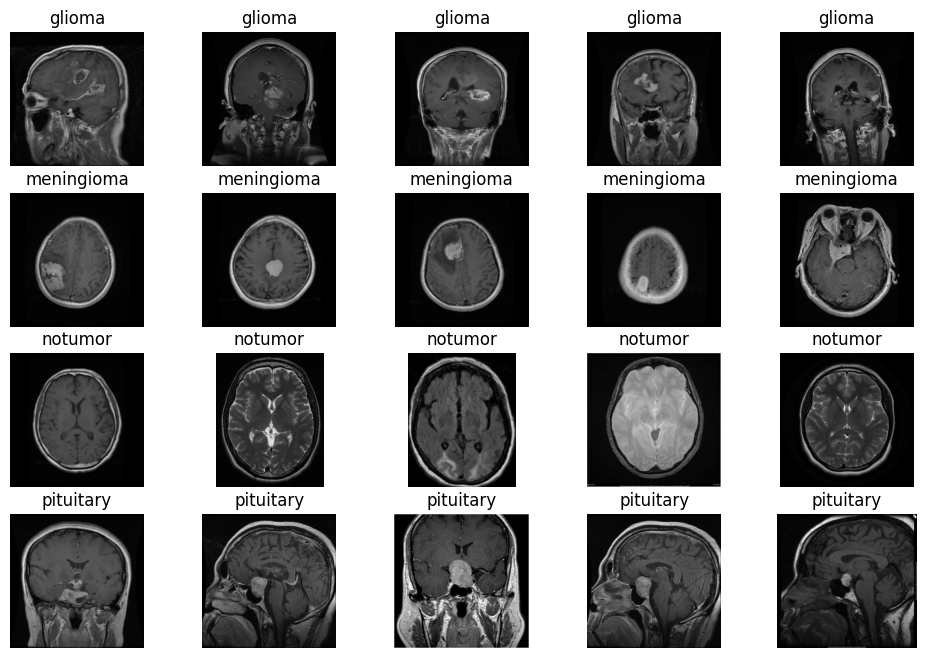

In [ ]:
if not os.path.exists(train_dir) or not os.path.exists(test_dir):
    print("Error: Specified directories do not exist.")
else:

    def plot_sample_images(data_dir, class_names):
        plt.figure(figsize=(12, 8))
        for i, class_name in enumerate(class_names):
            class_dir = os.path.join(data_dir, class_name)
            if not os.path.exists(class_dir):
                print(f"Error: Class folder '{class_name}' not found in '{data_dir}'.")
                return

            sample_images = os.listdir(class_dir)[:5]
            for j, image_name in enumerate(sample_images):
                img_path = os.path.join(class_dir, image_name)
                img = plt.imread(img_path)
                plt.subplot(4, 5, i*5 + j + 1)
                plt.imshow(img)
                plt.title(class_name)
                plt.axis('off')
        plt.show()


    class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

    plot_sample_images(train_dir, class_names)

**Define image data generators with data augmentation for training, validation, and testing**

In [ ]:
img_height, img_width = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_height, img_width),
                                                        batch_size=batch_size, class_mode='categorical',
                                                        classes=class_names)

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width),
                                                      batch_size=batch_size, class_mode='categorical',
                                                      classes=class_names)


Found 192 images belonging to 4 classes.
Found 192 images belonging to 4 classes.


**Model Building**

**Build a CNN model**

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])

**Compile the model**

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Train the model**

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
6/6 [==============================] - 102s 18s/step - loss: 1.4448 - accuracy: 0.3542 - val_loss: 1.4345 - val_accuracy: 0.1979
Epoch 2/10
6/6 [==============================] - 18s 3s/step - loss: 1.0702 - accuracy: 0.5677 - val_loss: 2.8160 - val_accuracy: 0.2656
Epoch 3/10
6/6 [==============================] - 21s 3s/step - loss: 1.0580 - accuracy: 0.5833 - val_loss: 2.0635 - val_accuracy: 0.3021
Epoch 4/10
6/6 [==============================] - 16s 3s/step - loss: 0.9709 - accuracy: 0.6823 - val_loss: 1.9252 - val_accuracy: 0.4010
Epoch 5/10
6/6 [==============================] - 21s 4s/step - loss: 0.8681 - accuracy: 0.6510 - val_loss: 2.4582 - val_accuracy: 0.4688
Epoch 6/10
6/6 [==============================] - 18s 3s/step - loss: 0.7569 - accuracy: 0.7448 - val_loss: 2.2325 - val_accuracy: 0.3646
Epoch 7/10
6/6 [==============================] - 17s 3s/step - loss: 0.6478 - accuracy: 0.7708 - val_loss: 2.3879 - val_accuracy: 0.5365
Epoch 8/10
6/6 [================

**Evaluate the model**

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


6/6 [==============================] - 3s 476ms/step - loss: 2.4309 - accuracy: 0.5469
Test Loss: 2.4309, Test Accuracy: 0.5469


**Visualize training history**

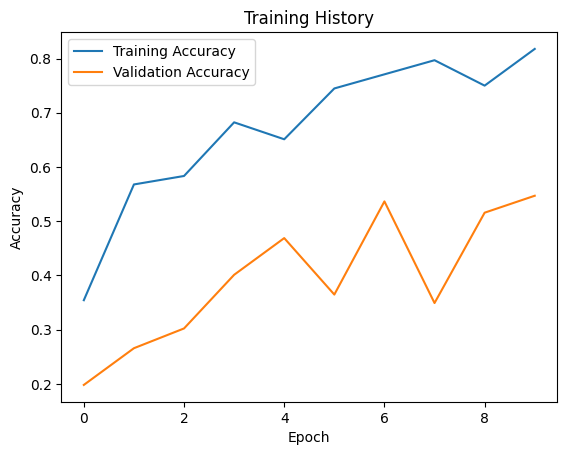

In [ ]:
def plot_training_history(history):
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.title('Training History')
        plt.show()

plot_training_history(history)


**Plot confusion matrix**

6/6 [==============================] - 5s 860ms/step


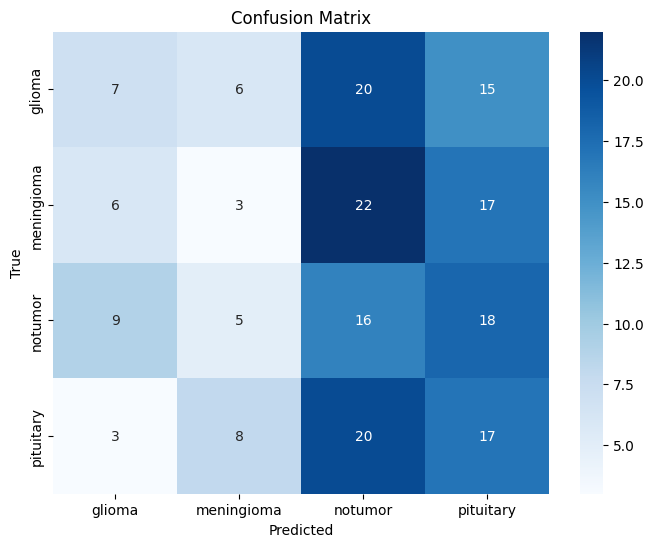

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
def plot_confusion_matrix(model, data_gen, class_names):
        y_true = data_gen.classes
        y_pred = model.predict(data_gen).argmax(axis=1)

        cm = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

plot_confusion_matrix(model, test_generator, class_names)


**Plot ROC curve for multiclass classification**

6/6 [==============================] - 3s 499ms/step


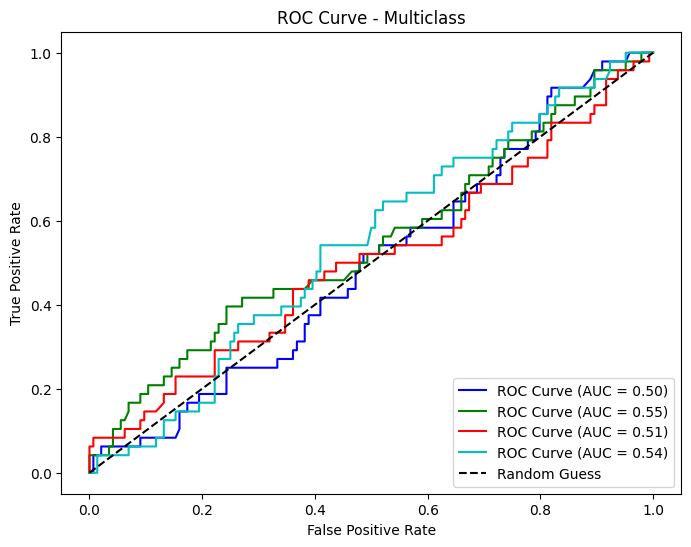

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
def plot_multiclass_roc_curve(model, data_gen, class_names):
        n_classes = len(class_names)
        y_true = data_gen.classes
        y_probs = model.predict(data_gen)


        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve((y_true == i).astype(int), y_probs[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure(figsize=(8, 6))
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], color=colors[i], label=f'ROC Curve (AUC = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve - Multiclass')
        plt.legend(loc='lower right')
        plt.show()
plot_multiclass_roc_curve(model, test_generator, class_names)

**Brain Tumor Detection**

In [ ]:
import matplotlib.pyplot as plt

**Set the Image Path**

In [ ]:
image_paths = [
    '/content/drive/MyDrive/Testing/glioma/Te-gl_0011.jpg',

]

**Lists to store the images for both tumor and no tumor cases**

In [ ]:
tumor_images = []
no_tumor_images = []

for image_path in image_paths:
    new_img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    new_img_array = tf.keras.preprocessing.image.img_to_array(new_img)
    new_img_array = np.expand_dims(new_img_array, axis=0)

**Normalize Pixel size of the images**

In [ ]:
new_img_array /= 255.0

**predict using the trained model**

In [ ]:
prediction = model.predict(new_img_array)
if prediction[0][0] > 0.5:
    tumor_images.append(new_img_array[0])
else:
    no_tumor_images.append(new_img_array[0])

1/1 [==============================] - 0s 121ms/step


**Acknowledge about the Image size**

In [ ]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

**Plot images with detected brain tumor**

In [ ]:
for i in range(len(tumor_images)):
    plt.subplot(1, len(tumor_images), i + 1)
    plt.imshow(tumor_images[i])
    plt.title("Brain Tumor Detected")
    plt.axis('off')

plt.show()

**Non-Brain Tumor Detection**

In [ ]:
img_path = '/content/drive/MyDrive/Testing/glioma/Te-gl_0016.jpg'
img_height, img_width = 150, 150

new_img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
new_img_array = tf.keras.preprocessing.image.img_to_array(new_img)
new_img_array = np.expand_dims(new_img_array, axis=0)
new_img_array /= 255.0  # Normalize pixel values


**predict using the trained model**

In [ ]:
prediction = model.predict(new_img_array)

if prediction[0][0] > 0.5:
    print("Brain Tumor Detected!")
else:
    print("No Brain Tumor Detected.")

1/1 [==============================] - 0s 43ms/step
No Brain Tumor Detected.


**Plot the Images**

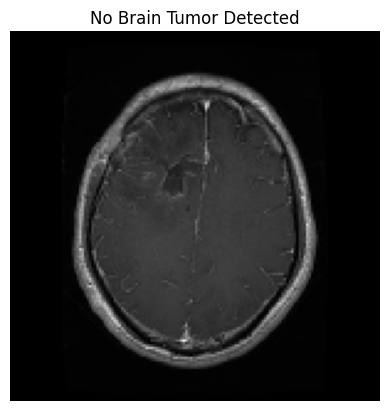

In [ ]:
plt.imshow(new_img)
if prediction[0][0] > 0.5:
    plt.title("Brain Tumor Detected")
else:
    plt.title("No Brain Tumor Detected")
plt.axis('off')
plt.show()

**Define multiple model architectures(RestNet50, vgg16 etc)**

In [ ]:
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

def build_resnet_model(input_shape, num_classes):
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
        x = GlobalAveragePooling2D()(base_model.output)
        output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
        model = tf.keras.Model(inputs=base_model.input, outputs=output)
        return model

def build_vgg16_model(input_shape, num_classes):
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
        x = GlobalAveragePooling2D()(base_model.output)
        output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
        model = tf.keras.Model(inputs=base_model.input, outputs=output)
        return model

**Build and train ResNet model**

In [ ]:
resnet_model = build_resnet_model((img_height, img_width, 3), len(class_names))
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_history = resnet_model.fit(train_generator, epochs=10, validation_data=test_generator, verbose=0)

94765736/94765736 [==============================] - 1s 0us/step


**Build and train VGG16 model**

In [ ]:
vgg16_model = build_vgg16_model((img_height, img_width, 3), len(class_names))
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_history = vgg16_model.fit(train_generator, epochs=10, validation_data=test_generator, verbose=0)

58889256/58889256 [==============================] - 0s 0us/step


**Visualizations and Evaluation Metrics**

In [ ]:
def plot_training_history(history, model_name):
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.title(f'{model_name} Training History')
        plt.show()


**Plot training history for ResNet and VGG16**

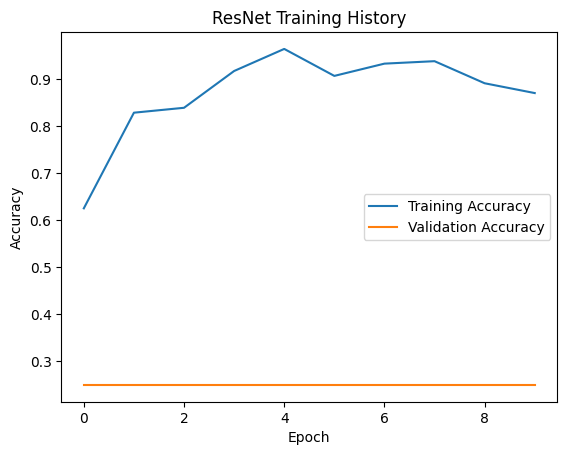

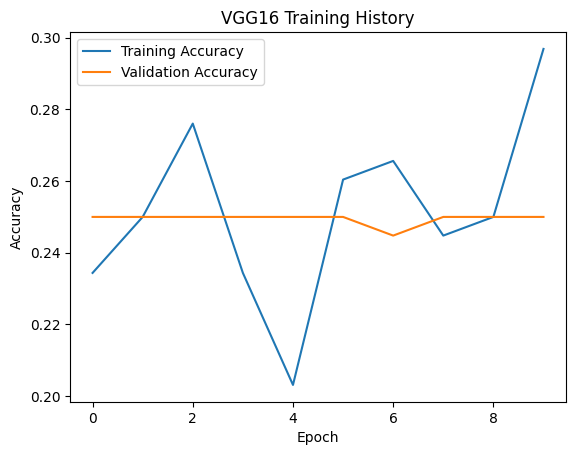

In [ ]:
plot_training_history(resnet_history, 'ResNet')
plot_training_history(vgg16_history, 'VGG16')

def plot_confusion_matrix(model, data_gen, class_names):
        y_true = data_gen.classes
        y_pred = model.predict(data_gen).argmax(axis=1)

        cm = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()